In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env
from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)


exam_score  hours_studied study_strategy handedness  coffee_consumed  \
0  100.591011       9.126291     flashcards       left                0   
1   95.637086       9.677438     flashcards       left                1   
2   53.200296       4.550207            NaN      right                5   

   hours_slept  
0           11  
1           10  
2            6

Answer with the type of stats test you would use (assume normal distribution):
Is there a relationship between the length of your arm and the length of your foot?  
PearsonR or Spearmans

Do guys and gals quit their jobs at the same rate?  
ind t-test, two tail

Does the length of time of the lecture correlate with a students grade?
PearsonsR or Spearmans

Use the telco_churn data.

In [94]:
pd.options.display.max_columns = None

In [95]:
db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  

Does tenure correlate with monthly charges?
(set hypothesis and alpha)
1. select data
2. plot data
3. test for assumptions (normal distro for correlation)
4. run test
6. draw conclusions

H0: there is no linear correlation  
HA: there is correlation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

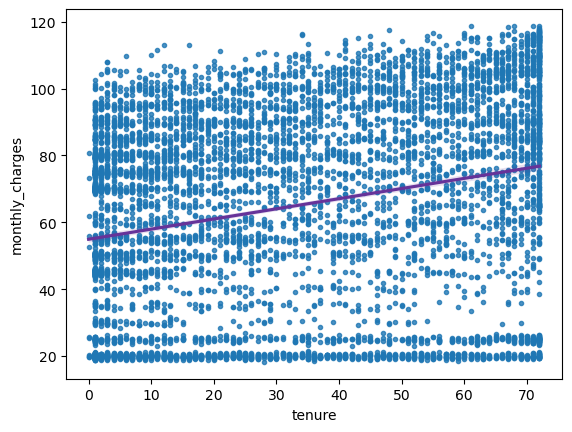

In [96]:
alpha = 0.05
charges_df = df [[ 'monthly_charges', 'tenure']]
charges_df.info()
sns.regplot( x = 'tenure', y = 'monthly_charges', data = charges_df, marker = '.', line_kws = {'color': 'rebeccapurple'})

<AxesSubplot:>

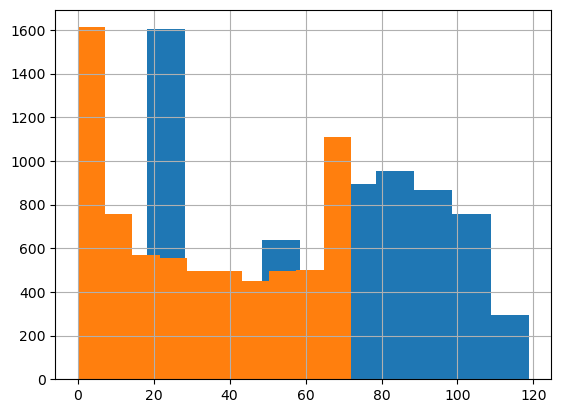

In [51]:
charges_df.monthly_charges.hist()
charges_df.tenure.hist()
#plotting out

In [52]:
r, p = stats.spearmanr(charges_df.tenure,charges_df.monthly_charges)
if p < alpha:
    print (f'reject the null hypothesis, there is a linear correlation ( p-value: {p})')
else:
    print(f'we fail to reject the null hypothesis that there is a linear correlation (p-value: {p})')

reject the null hypothesis, there is a linear correlation between, monthly charges and tenure ( p-value: 1.0271266876409408e-123)


**Takeaways**
there is a correlation between monthly charges and tenure

Total charges?

In [100]:
tot_charges_df = df [[ 'total_charges', 'tenure']]
tot_charges_df['total_charges'] = tot_charges_df['total_charges'].str.replace(' ', '0').astype('float')
#changing empty entries to 0s
tot_charges_df.sort_values('total_charges').head()

/var/folders/sg/t1npsh0d339fgq6w6l6jx3280000gn/T/ipykernel_17535/751687596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot_charges_df['total_charges'] = tot_charges_df['total_charges'].str.replace(' ', '0').astype('float')


total_charges  tenure
2250            0.0       0
2855            0.0       0
3052            0.0       0
945             0.0       0
1906            0.0       0

In [54]:
tot_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_charges  7043 non-null   float64
 1   tenure         7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


(set hypothesis and alpha)
1. select data, check for nulls
2. plot data
3. test for assumptions (normal distro for correlation)
4. run test
6. draw conclusions (takeaways)

H0: there is no linear correlation  
HA: there is a linear correlation



In [55]:
alpha = 0.05

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

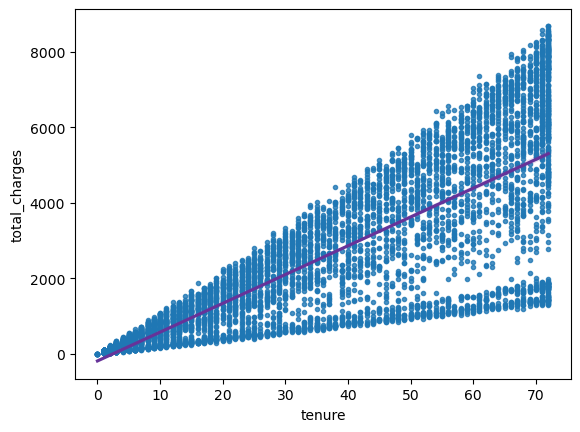

In [56]:
sns.regplot(x = 'tenure', y = 'total_charges', data = tot_charges_df,
           marker = ".", line_kws = {'color': 'rebeccapurple'})

In [57]:
r, p = stats.spearmanr(tot_charges_df.tenure,tot_charges_df.total_charges)
if p < alpha:
    print (f'rejected the null hypothesis; there is a linear correlation ( p-value: {p})')
else:
    print(f'failed to reject the null hypothesis that there is a linear correlation (p-value: {p})')

reject the null hypothesis, there is a linear correlation ( p-value: 0.0)


What happens if you control for phone and internet service?

Of customers who have only phone service:
H0 : no linear correlation
HA : there is linear correlation



In [60]:
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['tenure', 'monthly_charges']]
##plot out below
## sns.regplot(x = 'tenure', y = 'monthly_charges', data = phone_df, marker = '.', )

In [65]:
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
if p < alpha:
    print (f'reject the null hypothesis, there is a linear correlation between, \
monthly charges and tenure ( p-value: {p}), r-value: {r})')
else:
    print(f'we fail to reject the null hypothesis that there is a linear correlation\ between monthly\
    and tenure (p-value: {p} , r-value: {r})')

reject the null hypothesis, there is a linear correlation between, monthly charges and tenure ( p-value: 5.423601644635052e-222), r-value: 0.6644708508462759)


Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

In [67]:
db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
df = pd.read_sql("SELECT * FROM employees JOIN salaries USING (emp_no) WHERE to_date = '9999-01-01'", db_url)  

H0 = there is no linear correlation between employee tenure and their salary
HA = there is a linear correlation

select data
plot data
test for assumptions (normal distro for correlation)
run test
draw conclusions

<AxesSubplot:xlabel='tenure', ylabel='salary'>

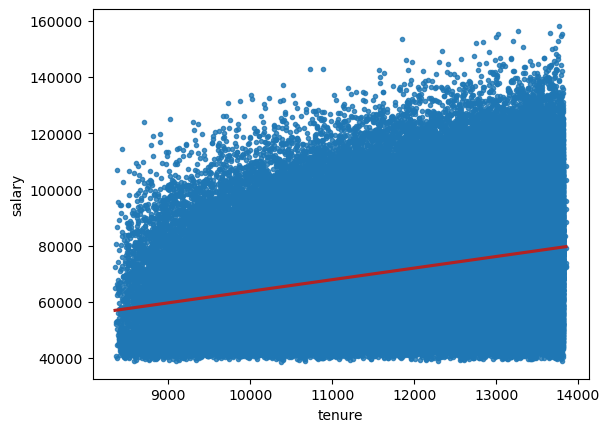

In [77]:
α= 0.05
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date)
df['tenure'] = df.tenure.astype('str').str.split(' ', expand = True)[0].astype('int')
tenure_df = df[['tenure','salary']]
#plot
sns.regplot(x='tenure', y = 'salary', data= tenure_df, marker = '.', line_kws = ({'color': 'firebrick'}))

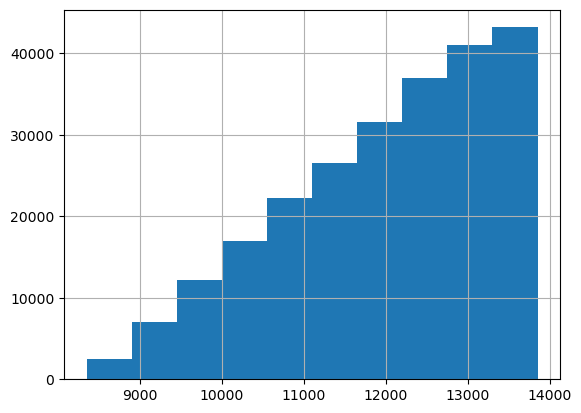

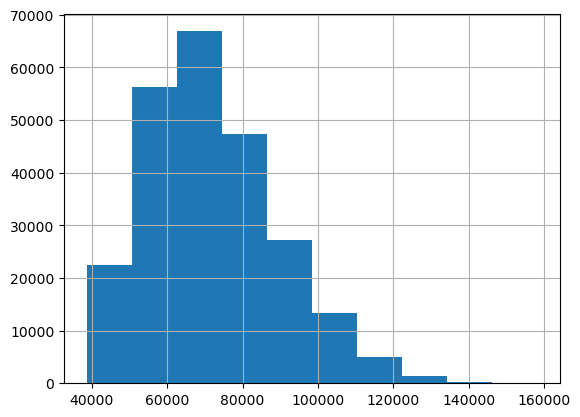

In [81]:
#looking for distro

tenure_df.tenure.hist()
plt.show()
tenure_df.salary.hist()
plt.show()

In [82]:
#not norm distro
r, p = stats.spearmanr(tenure_df.salary, tenure_df.tenure)
if p < alpha:
    print (f'reject the null hypothesis, there is a linear correlation between, \
monthly charges and tenure ( p-value: {p}), r-value: {r})')
else:
    print(f'we fail to reject the null hypothesis that there is a linear correlation\ between monthly\
    and tenure (p-value: {p} , r-value: {r})')

reject the null hypothesis, there is a linear correlation between, monthly charges and tenure ( p-value: 0.0), r-value: 0.31287835250105767)


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

(set hypothesis and alpha)  
H0 = there is no linear correlation between tenure and number of titles
HA = there is a linear correlation

select data, check for nulls
plot data
test for assumptions (normal distro for correlation)
run test
draw conclusions (takeaways)

In [83]:
alpha = 0.05
df.head()


emp_no  birth_date first_name last_name gender   hire_date  salary  \
0   10001  1953-09-02     Georgi   Facello      M  1986-06-26   88958   
1   10002  1964-06-02    Bezalel    Simmel      F  1985-11-21   72527   
2   10003  1959-12-03      Parto   Bamford      M  1986-08-28   43311   
3   10004  1954-05-01  Chirstian   Koblick      M  1986-12-01   74057   
4   10005  1955-01-21    Kyoichi  Maliniak      M  1989-09-12   94692   

    from_date     to_date  tenure  
0  2002-06-22  9999-01-01   13311  
1  2001-08-02  9999-01-01   13528  
2  2001-12-01  9999-01-01   13248  
3  2001-11-27  9999-01-01   13153  
4  2001-09-09  9999-01-01   12137

In [106]:
url = get_db_url(env.username, env.password, env.host, db='employees')

query = '''
select t.emp_no, count(t.title) as num_titles, te.tenure
from titles t
join (select emp_no, datediff(now(), min(from_date)) AS tenure
from titles
group by emp_no
having max(to_date) = '9999-01-01'
) te using (emp_no)
group by t.emp_no;
'''
#query generated in this manner to select for desired data
df = pd.read_sql(query, url)
df.info()#checking format of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

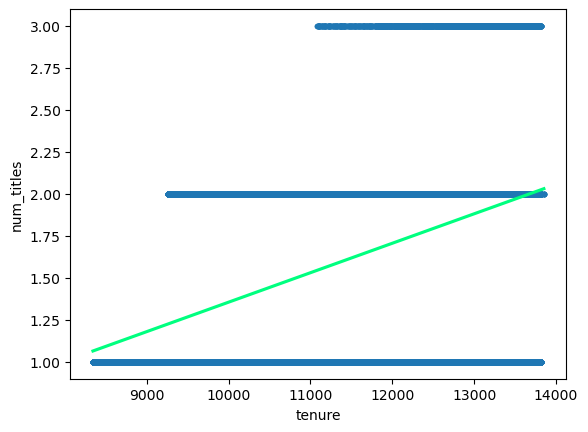

In [107]:
# plotting data
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'springgreen'}))

number of titles appears to be a discrete value, indicating that ANOVA or KW should be used instead

In [104]:
stats.levene(df.num_titles, df.tenure)
#levene to test for ability to use ANOVA on basis of variance

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [105]:
stats.kruskal(df.num_titles, df.tenure)
#kruskal is used because of unequivolent variance
#results indicate that there is a big difference between those with 1 vs 2, 1 vs 3, or 2 vs 3 titles

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

Use the sleepstudy data.
Is there a relationship between days and reaction time?

In [109]:
from pydataset import data
df = data('sleepstudy')
#pulling data

In [110]:
df.head() #preview

Reaction  Days  Subject
1  249.5600     0      308
2  258.7047     1      308
3  250.8006     2      308
4  321.4398     3      308
5  356.8519     4      308

H0 : there is no linear correlation  
HA : there is a linear correlation

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

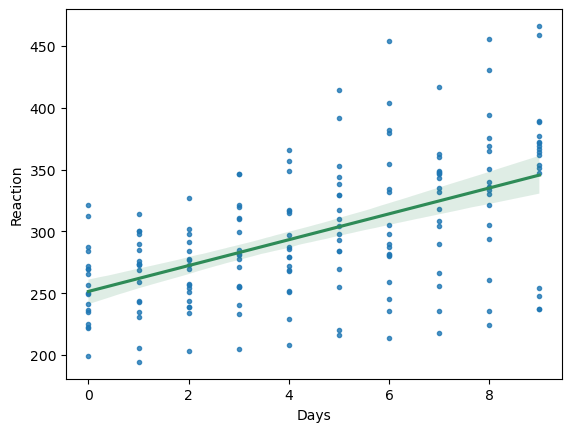

In [111]:
alpha = 0.05
df = df[['Reaction', 'Days']]
sns.regplot(x= 'Days', y = "Reaction", data = df, marker = '.', line_kws = ({'color': 'seagreen'}))

#plotting data 

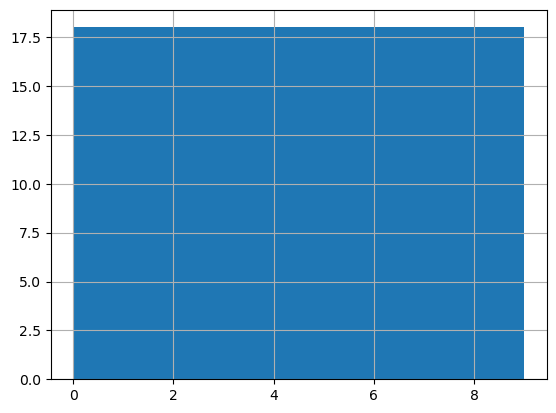

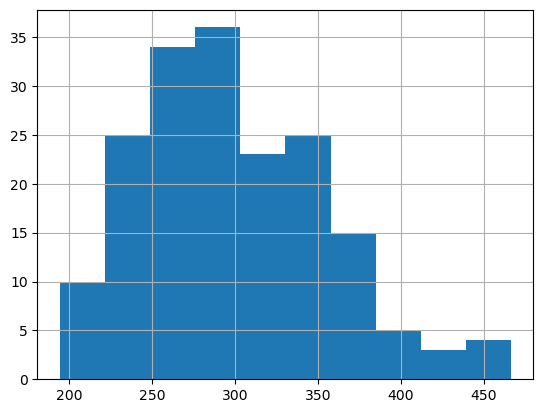

In [112]:
df.Days.hist()
plt.show()
df.Reaction.hist()
plt.show()

days is uniformly distro as indicated by a flat histo
reaction time is norm distro as indicated by the mountainy histo

In [113]:
r, p = stats.spearmanr(df.Days,df.Reaction)
if p < alpha:
    print (f'reject the null hypothesis, there is a linear correlation ( p-value: {p}), r-value: {r})')
else:
    print(f'we fail to reject the null hypothesis that there is a linear correlation (p-value: {p} , r-value: {r})')

reject the null hypothesis, there is a linear correlation ( p-value: 5.132878057706873e-14), r-value: 0.5228138502259547)


there is a linear correlation between days and reaction time